# Texas Rangers 2011 season statistics: Run differential

In [1]:
'''
   Scott Meyer
   
   Modeling the 2011 Texas Rangers season run 
   differential (Runs for - Runs allowed) with a
   normal curve. Demonstrating it's viability for
   estimating the number of games that fall within
   a given range using standard deviation.
'''

import numpy as np
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
'''
   Data is from baseball-reference.com
   Link: https://www.baseball-reference.com/teams/TEX/2011-schedule-scores.shtml    
'''

DATAdir  = "C:\\Users\\Owner\\Documents\\python_dir\\Misc_dir\\TEX_baseball_files\\"
tx_data_file = DATAdir + "tx_rangers_2010_11_sched_results.csv"

## Print subset of data to identify columns of interest

In [3]:
'''
   Read data into Python for analysis.
   Print dataframe header and first 30
   games to see data I am working with.
'''
#Read in .csv file with pandas
df = pd.read_csv(tx_data_file)

#remove header from data
tx_final_scores = df.values
tx_final_scores.shape

#print w/ header
print(df[0:10])

#print(list(df.columns))
#print(tx_final_scores[0:30])

   Gm#   Tm Home/Away  Opp W/L   R  RA       Win       Loss  Attendance
0    1  TEX       NaN  BOS   W   9   5    Oliver       Bard     50146.0
1    2  TEX       NaN  BOS   W  12   5     Lewis     Lackey     48356.0
2    3  TEX       NaN  BOS   W   5   1  Harrison   Buchholz     46326.0
3    4  TEX       NaN  SEA   W   6   4   Holland     Bedard     37618.0
4    5  TEX       NaN  SEA   W   3   2    Ogando     Pineda     30953.0
5    6  TEX       NaN  SEA   W   7   3    Wilson  Hernandez     25049.0
6    7  TEX         @  BAL   L   0   5   Britton      Lewis         NaN
7    8  TEX         @  BAL   W  13   1  Harrison    Arrieta     36243.0
8    9  TEX         @  BAL   W   3   0   Holland    Guthrie     21452.0
9   10  TEX         @  DET   W   2   0    Ogando  Verlander     18724.0


## 1. Modeling run differential for full length of season with a normal curve

In [4]:
'''
   Calculate run differential for each game of the
   regular season. 
   
   Length of season is 162 games.
'''
total_games = tx_final_scores.shape[0]
rdiff_season = np.zeros([total_games,],dtype=int)
rdiff_sample = np.zeros([27,],dtype=int)

for games in range(total_games):
    rdiff_season[games] = tx_final_scores[games,5] - tx_final_scores[games,6]
    

#Find end of season run differential
print('\033[1m'+'Season long run differential:'+'\033[0m'+' '+ '+' + str(np.sum(rdiff_season))+ ' ' +'runs')

Season long run differential: +178 runs


### Calculate mean and standard deviation of run differential data

In [5]:
'''
   Find standard deviation and mean for run differential
   spanning full season.
   
   Since all run differential data is whole numbers,
   round the mean and standard deviation to the tenths
   place.
   
   Rule of thumb is to round statistical values to one
   extra decimal place than the largest decimal place
   in the data.
'''

#Mean
rdiff_season_mean = np.round(np.mean(rdiff_season),1)

#Standard Deviation 
eq_part = np.zeros(total_games,)

for games in range(total_games):
    eq_part[games] = np.square(rdiff_season[games] - rdiff_season_mean)

summation = np.sum(eq_part)
std_season = np.round(np.sqrt(summation/(total_games)),1)

#Print Values
print('\033[1m'+'Mean run differential:'+'\033[0m'+' '+str(rdiff_season_mean))
print('\033[1m'+'Standard deviation:'+'\033[0m'+' '+str(std_season))

Mean run differential: 1.1
Standard deviation: 4.7


In [6]:
'''
   Finding maximum and minimum run differential (win and loss)
   for Texas Rangers 2010-2011 regular season. 
   
   This information is used to find the proper run differential bin 
   count for full season.
'''

rdiff_min = np.min(rdiff_season)
rdiff_max = np.max(rdiff_season)

print('\033[1m'+'Lowest run differential:'+'\033[0m'+' '+str(rdiff_min))
print('\033[1m'+'Highest run differential:'+'\033[0m'+' '+str(rdiff_max))

Lowest run differential: -11
Highest run differential: 14


### Plot normal curve and define relevant parameters

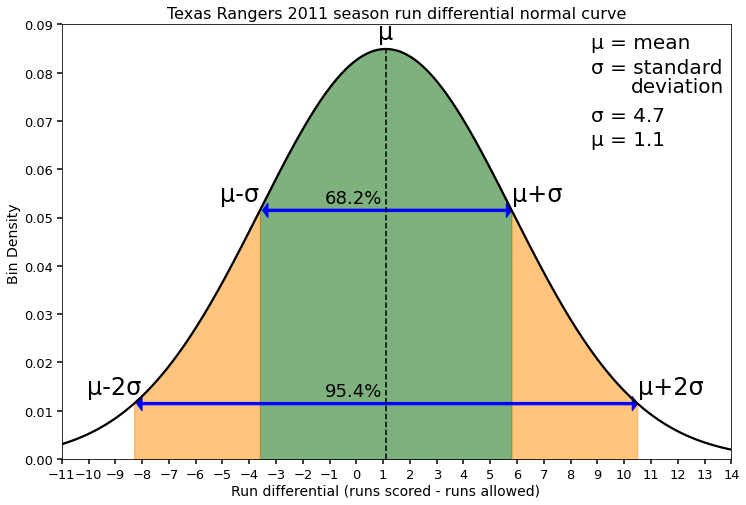

In [7]:
'''
   Plot of key variable definitions for a normal curve.
   Demonstrate with generated normal curve for 2011
   Texas Rangers season data.
   
   Note: If I do not round np.arange to the decimal place 
   of the incriment, then the values for the array will 
   slightly deviate from the set incriment). This means I 
   I would have to use  np.isclose(x,index location of desired 
   value in array).
   
         *****Further details of figure below*****
   
   68.2% of regular season games are expected to fall within 
   one standard deviation of the mean (Lose by less than 4 
   runs OR win by less than 6 runs)
   
   95.4% of games are expected to fall within two standard
   deviations of the mean (Lose by less than 9 runs OR win 
   by no less than 11 runs)
   
   4.6% of games are expected to fall outside of two standard
   deviations of the mean(Lose by 9 runs or more OR win by 
   11 runs or more)
'''

x = np.round(np.arange(rdiff_season_mean-std_season*3,
                       rdiff_season_mean+std_season*3,
                       0.01),2)

norm_curve_eq = norm.pdf(x,rdiff_season_mean,std_season)


std_neg1_idx = int(np.where(np.isclose(x,rdiff_season_mean-std_season))[0])
std_1_idx = int(np.where(np.isclose(x,rdiff_season_mean+std_season))[0])
std_neg2_idx = int(np.where(np.isclose(x,rdiff_season_mean-2*std_season))[0])
std_2_idx = int(np.where(np.isclose(x,rdiff_season_mean+2*std_season))[0])


plot_x_mean = [rdiff_season_mean,rdiff_season_mean]
plot_y_mean = [0,np.max(norm_curve_eq)]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

'''
   Plot normal curve and shade regions below line.
   Label relevant information for shaded regions.
'''

norm_curve_plot = ax.plot(x,norm_curve_eq,color='k',linewidth=2.25)

fill_1_std = ax.fill_between(x[std_neg1_idx:std_1_idx],0,
                             norm_curve_eq[std_neg1_idx:std_1_idx],
                             color='darkgreen', alpha=0.5)

fill_2_std_left = ax.fill_between(x[std_neg2_idx:std_neg1_idx],0,
                                  norm_curve_eq[std_neg2_idx:std_neg1_idx],
                                  color='darkorange', alpha=0.5)

fill_2_std_right = ax.fill_between(x[std_1_idx:std_2_idx],0,
                                   norm_curve_eq[std_1_idx:std_2_idx],
                                   color='darkorange', alpha=0.5)

ax.text(rdiff_season_mean,np.max(norm_curve_eq)+0.002,
        'μ',fontsize='24',horizontalalignment='center')
ax.text(x[std_1_idx],norm_curve_eq[std_1_idx]+0.002,
        'μ+σ',fontsize='24')
ax.text(x[std_2_idx],norm_curve_eq[std_2_idx]+0.002,
        'μ+2σ',fontsize='24')
ax.text(x[std_neg1_idx]-1.5,norm_curve_eq[std_neg1_idx]+0.002,
        'μ-σ',fontsize='24')
ax.text(x[std_neg2_idx]-1.75,norm_curve_eq[std_neg2_idx]+0.002,
        'μ-2σ',fontsize='24')

mean_line = ax.plot(plot_x_mean,plot_y_mean,color='k',linestyle='--',linewidth=1.5)
#arrow drawing
for a in range(2):
    if a == 0:
        length = std_season - 0.2
    else:
        length = (std_season)*-1 + 0.3
        
    plt.arrow(rdiff_season_mean,norm_curve_eq[std_neg1_idx],
              length,0,head_width=0.003, head_length=0.2, width=0.0005,
              fc='b', ec='b')
    
for a in range(2):
    if a == 0:
        length = std_season*2 + 0.2 - 0.4
    else:
        length = (std_season*2 + 0.2)*-1 + 0.5
        
    plt.arrow(rdiff_season_mean,norm_curve_eq[std_neg2_idx],
              length,0,head_width=0.003, head_length=0.2, width=0.0005,
              fc='b', ec='b')
    
ax.text(rdiff_season_mean-1.2,0.053,
        '68.2%',fontsize='18',horizontalalignment='center')
ax.text(rdiff_season_mean-1.2,0.013,
        '95.4%',fontsize='18',horizontalalignment='center')

x_ax_set = ax.set_xlim([rdiff_min,rdiff_max])
xlabels = np.arange(rdiff_min,rdiff_max+1,1)
xticks_plot = ax.set_xticks(xlabels)

y_ax_set = ax.set_ylim([0,0.09])

'''Label symbol definitions and values for each symbol'''
ax.text(8.75,0.085,'μ = mean',fontsize=20)
ax.text(8.75,0.08,'σ = standard',fontsize=20)
ax.text(10.25,0.076,'deviation',fontsize=20)
#standard deviation number season
ax.text(8.75,0.07,str('σ ='+' '+str(std_season)),fontsize=20)
ax.text(8.75,0.065,str('μ ='+' '+str(rdiff_season_mean)),fontsize=20)

ax.tick_params(axis='both',labelsize=13)
ax.tick_params(length=5,width=1.5)

title_plot = plt.title('Texas Rangers 2011 season run differential normal curve',fontsize= 16)
xlabel = fig.text(0.5, 0.07, 'Run differential (runs scored - runs allowed)', ha='center', va='center', fontsize = 14)
ylabel = fig.text(0.07, 0.5, 'Bin Density', ha='center', va='center', rotation='vertical', fontsize = 14)

### Plot histogram of data both with and without normal curve overplotted

In [8]:
'''
   Find run differential count of games that fall within 
   the range of minimum and maximum run differential for full
   season (In other words, find run differential for all possible
   bins). 
   
   For np.digitize to properly find bin count for largest
   run differential for a win or loss, must use bin incriments
   that shifted in the positive x-direction. That way, the "-10.9"
   bin accounts for the games where the Rangers lost by 11 runs 
   (-11 run differential) since the funtion counts all values to
   the left of the bin center (towards the negative direction),
   but not the values that fall exactly on the bin center. If I use
   a set  bin as "-11", it will not count games where the Rangers 
   lost by 11 for that bin.
'''    

bins_data = np.digitize(rdiff_season,bins = np.arange(rdiff_min+0.1,rdiff_max+1.1,1))
bins_count = np.bincount(bins_data)

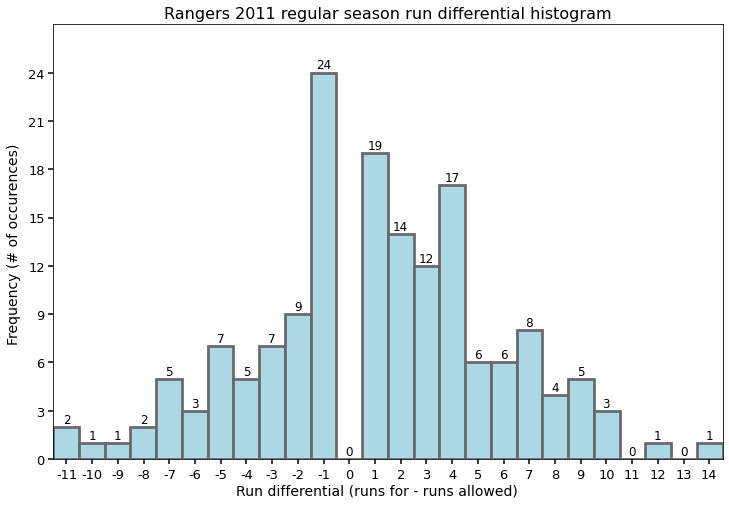

In [9]:
'''
   Histogram of run differential for full season with
   labels for each bin count.
   
   Set bin count to 1 since that is the number used to
   count each run scored.
'''

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.hist(rdiff_season,bins=bins_count.shape[0],color='lightblue',ec='dimgray',linewidth=2.75)

x_ax_set = ax.set_xlim([rdiff_min,rdiff_max])
y_ax_set = ax.set_ylim([0,27])

ax.tick_params(axis='both',labelsize=13)
ax.tick_params(length=5,width=1.5)

'''
   Label for count for each run differential bin and
   adjust x-axis tickmarks to be centered at each bin
   for clear labeling of all represented bins.
'''
x_tickmarks = np.zeros(bins_count.shape[0])
rdiff_range = np.arange(rdiff_min,rdiff_max+1,1)
offset = np.linspace(0.5,-0.5,bins_count.shape[0])

for labels in range(bins_count.shape[0]):
    bin_count_labels = ax.text(rdiff_range[labels]+offset[labels],
                               bins_count[labels]+0.25,
                               str(bins_count[labels]),fontsize='12',
                               horizontalalignment='center')
                               
    x_tickmarks[labels] = rdiff_range[labels] + offset[labels]
                               
xtick_plot = ax.set_xticks(x_tickmarks)
xticklabels = ax.set_xticklabels(rdiff_range)
ytick_plot = ax.set_yticks(np.arange(0,27,3))

title_plot = plt.title('Rangers 2011 regular season run differential histogram',fontsize= 16)
xlabel = fig.text(0.5, 0.07, 'Run differential (runs for - runs allowed)', ha='center', va='center', fontsize = 14)
ylabel = fig.text(0.08, 0.5, 'Frequency (# of occurences)', ha='center', va='center', rotation='vertical', fontsize = 14)

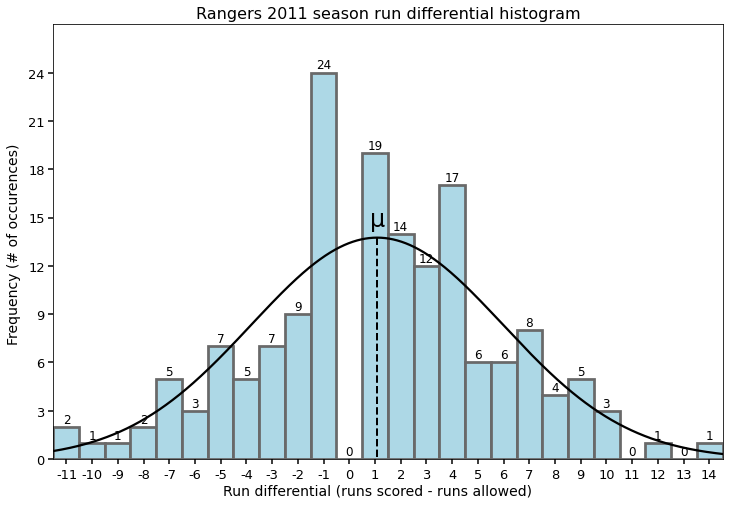

In [10]:
'''
   Overlay normal curve on histogram bins.
   
   Since the probability density function is:
   f(x) = (# of X in same bin as x)/(bin width * total number of games)
   
   Here, the normal curve approximation uses the mean run differential for
   total number of games to find the probability density function. I can 
   multiply the probability density function by the total number of
   games to find the normal curve that is scaled to the histogram of
   run differential data. This takes into account that the bin width is 1, 
   the score count for each run.
'''

norm_curve_scaled = norm_curve_eq*total_games

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.hist(rdiff_season,bins=bins_count.shape[0],color='lightblue',ec='dimgray',linewidth=2.75)
norm_curve_hist = ax.plot(x,norm_curve_scaled,color='k',linewidth=2.25)

plot_x_mean = [rdiff_season_mean,rdiff_season_mean]
plot_y_mean_hist = [np.min(norm_curve_scaled),np.max(norm_curve_scaled)]

mean_line_hist = ax.plot(plot_x_mean,plot_y_mean_hist,color='k',linestyle='--',linewidth=2)
mean_label = ax.text(rdiff_season_mean,np.max(norm_curve_scaled)+0.75,'μ',fontsize='24',horizontalalignment='center')

x_ax_set = ax.set_xlim([rdiff_min,rdiff_max])
y_ax_set = ax.set_ylim([0,27])

ax.tick_params(axis='both',labelsize=13)
ax.tick_params(length=5,width=1.5)

x_tickmarks = np.zeros(bins_count.shape[0])
rdiff_range = np.arange(rdiff_min,rdiff_max+1,1)
offset = np.linspace(0.5,-0.5,bins_count.shape[0])

for labels in range(bins_count.shape[0]):
    bin_count_labels = ax.text(rdiff_range[labels]+offset[labels],
                               bins_count[labels]+0.25,
                               str(bins_count[labels]),fontsize='12',
                               horizontalalignment='center')
                               
    x_tickmarks[labels] = rdiff_range[labels] + offset[labels]
                               
xtick_plot = ax.set_xticks(x_tickmarks)
xticklabels = ax.set_xticklabels(rdiff_range)
ytick_plot = ax.set_yticks(np.arange(0,27,3))

title_plot = plt.title('Rangers 2011 season run differential histogram',fontsize= 16)
xlabel = fig.text(0.5, 0.07, 'Run differential (runs scored - runs allowed)', ha='center', va='center', fontsize = 14)
ylabel = fig.text(0.08, 0.5, 'Frequency (# of occurences)', ha='center', va='center', rotation='vertical', fontsize = 14)

### Tests with data using mean and standard deviation

In [11]:
'''
    Class for coloring print statement output
    and background.
    
    These are the options I have to use for
    styling print statements. In this jupyter
    notebook, I will only use font colors, 
    not background colors.
'''

class color:
   #Font colors
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

   # Background colors
   GREYBG = '\033[100m'
   REDBG = '\033[101m'
   GREENBG = '\033[102m'
   YELLOWBG = '\033[103m'
   BLUEBG = '\033[104m'
   PINKBG = '\033[105m'
   CYANBG = '\033[106m' 

In [12]:
'''
    Check to see if normal curve is a proper tool to estimate
    the expected frequency of games with a given run differential
    range for the 2011 Texas Rangers regular season using standard
    deviation.
    
    Do one-tailed and two-tailed tests.
    
    Definitions:
    
    Mode: The value that occurs most frequently in observations, 
    which is losing by one run for this particular season (-1 run
    differential).
    
    Median: The run differential value that falls in the middle 
    of all run differential values in the season (separates lower
    and higher values). 
'''


'''
   Two-tailed tests 
'''
count_1_std = 0
for games in range(total_games):
    if rdiff_season[games] > (rdiff_season_mean - std_season) and rdiff_season[games] < (rdiff_season_mean + std_season):
        count_1_std = count_1_std + 1
    else:
        continue

count_2_std = 0
for games in range(total_games):
    if rdiff_season[games] > (rdiff_season_mean - 2*std_season) and rdiff_season[games] < (rdiff_season_mean + 2*std_season):
        count_2_std = count_2_std + 1
    else:
        continue

'''
   One-tailed tests 
'''
count_neg1_std = 0
count_pos1_std = 0
for games in range(total_games):
    if rdiff_season[games] > (rdiff_season_mean - std_season) and rdiff_season[games] < rdiff_season_mean:
        count_neg1_std = count_neg1_std + 1
    elif rdiff_season[games] < (rdiff_season_mean + std_season) and rdiff_season[games] < rdiff_season_mean:
        count_pos1_std = count_pos1_std + 1
    else:
        continue

        
count_neg2_std = 0
count_pos2_std = 0
for games in range(total_games):
    if rdiff_season[games] > (rdiff_season_mean - 2*std_season) and rdiff_season[games] < rdiff_season_mean:
        count_neg2_std = count_neg2_std + 1
    elif rdiff_season[games] < (rdiff_season_mean + 2*std_season) and rdiff_season[games] > rdiff_season_mean:
        count_pos2_std = count_pos2_std + 1
    else:
        continue
'''
   Printing test results
'''

#Two-tailed tests
print(color.BOLD+color.UNDERLINE+'Two-tailed tests'+color.END,'\n')

std_1_range = str(np.round((count_1_std/total_games)*100,1))
print(color.BOLD+color.BLUE+'Games falling between 1σ of mean'+color.END)
print('Actual:'+' '+std_1_range+'%')
print('Expected:'+' '+'68.2%')
print('\n',end='')

std_2_range = str(np.round((count_2_std/total_games)*100,1))
print(color.BOLD+color.BLUE+'Games falling between 2σ of the mean'+color.END)
print('Actual:'+' '+std_2_range+'%')
print('Expected:'+' '+'95.4%')
print('\n',end='')

outliers = str(np.round(100-(count_2_std/total_games)*100,1))
print(color.BOLD+color.BLUE+'All data falling outside of 2σ of the mean'+color.END)
print('Actual:'+' '+outliers+'%')
print('Expected:'+'4.6%')
print('\n',end='')


#One-tailed tests
print(color.BOLD+color.UNDERLINE+'One-tailed tests'+color.END,'\n')

std_neg1_range = str(np.round((count_neg1_std/total_games)*100,1))
print(color.BOLD+color.RED+'Games falling within 1σ to the left of the mean'+color.END)
print('Actual:'+' '+std_neg1_range+'%')
print('Expected:'+' '+'34.1%')
print('\n',end='')

std_neg2_range = str(np.round((count_neg2_std/total_games)*100,1))
print(color.BOLD+color.RED+'Games falling within 2σ to the left of the mean'+color.END)
print('Actual:'+' '+std_neg2_range+'%')
print('Expected:'+' '+'47.7%')
print('\n',end='')

std_pos1_range = str(np.round((count_pos1_std/total_games)*100,1))
print(color.BOLD+color.RED+'Games falling within 1σ to the right of the mean'+color.END)
print('Actual:'+' '+std_pos1_range+'%')
print('Expected:'+' '+'34.1%')
print('\n')

std_pos2_range = str(np.round((count_pos2_std/total_games)*100,1))
print(color.BOLD+color.RED+'Games falling within 2σ to the right of the mean'+color.END)
print('Actual:'+'\033[0m'+' '+std_pos2_range+'%')
print('Expected:'+' '+'47.7%')
print('\n')


#Other metrics
print(color.BOLD+color.UNDERLINE+'Other relevant metrics'+color.END,'\n')
print('Mode:'+' '+'-1')
median_val = str(int(np.median(rdiff_season)))
print('Median:'+' '+median_val)

Two-tailed tests 

Games falling between 1σ of mean
Actual: 66.7%
Expected: 68.2%

Games falling between 2σ of the mean
Actual: 96.3%
Expected: 95.4%

All data falling outside of 2σ of the mean
Actual: 3.7%
Expected:4.6%

One-tailed tests 

Games falling within 1σ to the left of the mean
Actual: 36.4%
Expected: 34.1%

Games falling within 2σ to the left of the mean
Actual: 50.0%
Expected: 47.7%

Games falling within 1σ to the right of the mean
Actual: 16.0%
Expected: 34.1%


Games falling within 2σ to the right of the mean
Actual: 46.3%
Expected: 47.7%


Other relevant metrics 

Mode: -1
Median: 1


In [13]:
'''
   A normal curve is a satisfactory model for season-long
   run differential for the 2011 Texas Rangers season, however
   the run differential data is skewed in the histogram to the 
   left of the mean. A plausible reason for this is because
   of games decided in extra innings.
   
   ***Now, account for games that went to extra innings***
   
   Objective is to look at run differential for all games
   through the regular duration of the game (9 innings)
   since extra inning games wins or losses by more than one 
   run in the MLB are possible.
   
   Assign all games that went to extra innings as a 0
   run differential game.
   
   First, find index locations in final score data
   for games that went to extra innings. They are
   assigned 'W-wo' or 'L-wo' in data.
'''


ex_inn_gms_idx = []
for games in range(total_games):
    win_loss_ot = tx_final_scores[games,4]
    if win_loss_ot == 'W-wo' or win_loss_ot == 'L-wo':
        ex_inn_gms_idx.append([games]) 

In [14]:
'''
   Convert list to array and make data a vector for indexing
'''
ex_inn_gms_idx = np.concatenate(np.asarray(ex_inn_gms_idx))

In [15]:
'''
   Create duplicate of array to reassign extra 
   inning games to zero.
'''
rdiff_season_2 = np.copy(rdiff_season)
for games in enumerate(ex_inn_gms_idx):
    idx = games[1]
    rdiff_season_2[idx] = 0

In [16]:
'''
   Assign data to bins for histogram plot. 
'''
bins_data_2 = np.digitize(rdiff_season_2,bins = np.arange(-10.9,14.9,1))
bins_count_2 = np.bincount(bins_data_2)

In [17]:
'''
    New mean, mode, median, standard deviation for data
    accounting for games going to extra innings.
'''


print(color.BOLD+'Mean and standard deviation with extra inning games set to 0'+color.END,'\n')

#Mean
rdiff_season_mean_2 = np.round(np.mean(rdiff_season_2),1)

#Standard deviation
eq_part = np.zeros(total_games,)

for games in range(total_games):
    eq_part[games] = np.square(rdiff_season_2[games] - rdiff_season_mean_2)

summation = np.sum(eq_part)
std_season_2 = np.round(np.sqrt(summation/(total_games)),1)

#Print values
print('Mean run differential:'+ ' '+ str(rdiff_season_mean_2))
print('Standard deviation:'+ ' ' + str(std_season_2))

Mean and standard deviation with extra inning games set to 0 

Mean run differential: 1.1
Standard deviation: 4.7


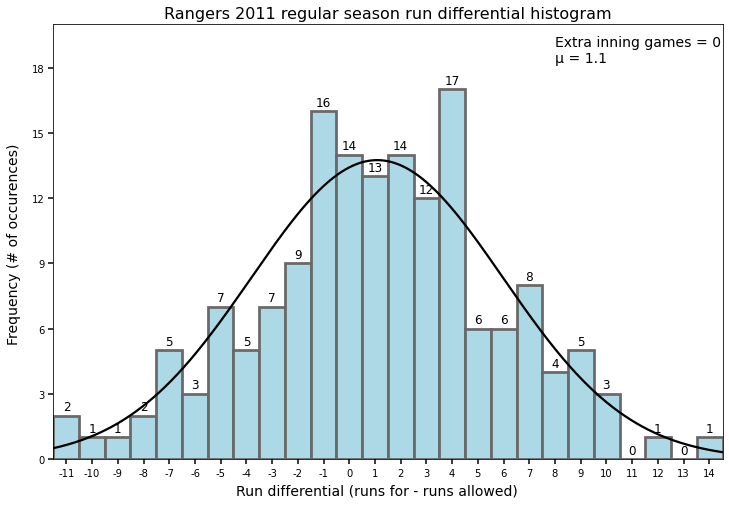

In [18]:
'''
   Plot histogram with scaled normal curve overlayed for
   data with extra games run differential set to zero.
'''

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.hist(rdiff_season_2,bins=bins_count_2.shape[0],color='lightblue',ec='dimgray',linewidth=2.75)
norm_curve_hist = ax.plot(x,norm_curve_scaled,color='k',linewidth=2.25)

x_ax_set = ax.set_xlim([rdiff_min,rdiff_max])
y_ax_set = ax.set_ylim([0,20])

ax.tick_params(length=5,width=1.5)

x_tickmarks = np.zeros(bins_count_2.shape[0])
rdiff_range = np.arange(rdiff_min,rdiff_max+1,1)
offset = np.linspace(0.5,-0.5,bins_count_2.shape[0])

'''
   Same method for setting x-ticks and histogram
   labels as in plot in prior cell.
'''
for labels in range(bins_count_2.shape[0]):
    bin_count_labels = ax.text(rdiff_range[labels]+offset[labels],
                               bins_count_2[labels]+0.25,
                               str(bins_count_2[labels]),fontsize='12',
                               horizontalalignment='center')
                               
    x_tickmarks[labels] = rdiff_range[labels] + offset[labels]
                               
xtick_plot = ax.set_xticks(x_tickmarks)
xticklabels = ax.set_xticklabels(rdiff_range)
ytick_plot = ax.set_yticks(np.arange(0,18+3,3))

ax.text(7.75,19,'Extra inning games = 0',fontsize=14)
ax.text(7.75,18.25,str('μ ='+' '+str(rdiff_season_mean)),fontsize=14)
title_plot = plt.title('Rangers 2011 regular season run differential histogram',fontsize= 16)
xlabel = fig.text(0.5, 0.07, 'Run differential (runs for - runs allowed)', ha='center', va='center', fontsize = 14)
ylabel = fig.text(0.08, 0.5, 'Frequency (# of occurences)', ha='center', va='center', rotation='vertical', fontsize = 14)

In [19]:
'''
   Non-adjusted mean and standard deviation are identical
   to analysis where extra inning games were not taken into 
   account.
   
   Check to see run differential for all extra inning games
   to verify the above results.
    
   Store game number index in regular season that went to 
   extra innings as well as the final run differential for 
   each game.
'''
ex_inn_rdiff = np.zeros(ex_inn_gms_idx.shape[0])
index_labels = []

win_count = 0
loss_count = 0
for games in enumerate(ex_inn_gms_idx):
    idx_store = games[0]
    idx_rdiff = games[1]
    ex_inn_rdiff[idx_store] = int(rdiff_season[idx_rdiff])
    
    #Add 1 to game number stored in list since Python indexing starts at 0 
    index_labels.append('Game #'+ ' '+str(games[1]+1))
    if rdiff_season[idx_rdiff] > 0:
        win_count = win_count + 1
    else:
        loss_count = loss_count + 1

### ***Opted to use a different method to print dataframe with styling (in cell below)***


#print('\033[1m'+'Extra inning games run differential'+'\033[0m'+'\n')
#df = pd.DataFrame(ex_inn_rdiff)
#df.index = index_labels
#df.columns = ["Run diff"]
#df.style.applymap(df_color).set_properties(**{'font-weight': 'bold',
#                                              'background-color': 'lightgrey'}).set_table_styles([{'selector': 'th', 
#                                                                                                   'props': [('border-style','solid'),
#                                                                                                            ('border-width','1px')]}]).format("{:.0f}")

In [20]:
'''
   Function to color data in pandas dataframe based on
   whether they won or lost a given extra inning game.
'''
def df_color(value):
    if value > 0:
        color = 'black'
    else:
        color = 'red'
    return 'color: %s' % color

In [21]:
'''
   Set properties and print pandas dataframe.
   Data values printed in black (red) are for 
   games which the Rangers won (lost) in extra 
   innings.
'''

# Set properties for "th" (header and row labels) elements in dataframe
th_props = [
  ('font-size', '12px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('border-style','solid'),
  ('border-width','1.5px'),
  ('border-color','black')
  ]

# Set properties for "td" (data) elements in dataframe
td_props = [
  ('font-size', '12px'),
  ('text-align','center'),
  ('font-weight', 'bold'),
  ('border-style','solid'),
  ('border-width','1.5px'),
  ('border-color','black')
  ]

# Set table styles for use in printing dataframe
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

print('\033[1m'+'Extra inning games run differential'+'\033[0m'+'\n')
df = pd.DataFrame(ex_inn_rdiff)
df.index = index_labels
df.columns = ["Run diff"]
(df.style
    .applymap(df_color)
    .format("{:.0f}")
    .set_table_styles(styles))

Extra inning games run differential



,Run diff
Game # 11,-1
Game # 12,-1
Game # 29,-1
Game # 44,-1
Game # 53,1
Game # 64,-1
Game # 70,-1
Game # 75,1
Game # 91,1
Game # 101,1


In [22]:
'''
   2011 regular season W-L record in extra innings.
'''
print(color.BOLD+'Texas Rangers extra inning games record 2011 season'+color.END)
print(str(win_count)+'W-'+str(loss_count)+'L')

Texas Rangers extra inning games record 2011 season
6W-8L


In [23]:
'''
   Analysis of above two cells:
   
   Since all extra inning games were decided by one run and the Rangers
   regular season extra inning record was nearly .500, the rounded 
   mean/standard deviation remain the same. Thus, the run differential 
   falling within one and two standard deviations of the mean should not 
   change. 
   
   3. Find regular season run differential for sample of season, which 
      I choose to be final ~25 games of the regular season.
   
   I want to start with a game that marks the beginning of a regular
   season series. First, print final 30 games from original dataframe
   to make sure I start end of season sample at the beginning of a
   regular season series.
'''


for games in range(30,0,-1):
    #add 1 since python indexing starts at 0
    sample_game_no_print = 'Sample Game #'+' '+str(30-games+1)
    print(sample_game_no_print,tx_final_scores[-games])

Sample Game # 1 [133 'TEX' nan 'LAA' 'W' 11 7 'Holland' 'Haren' 38256.0]
Sample Game # 2 [134 'TEX' nan 'LAA' 'L' 4 8 'Santana' 'Wilson' 48453.0]
Sample Game # 3 [135 'TEX' nan 'LAA' 'W' 9 5 'Oliver' 'Weaver' 40018.0]
Sample Game # 4 [136 'TEX' nan 'TBR' 'W' 2 0 'Feldman' 'Hellickson' 23069.0]
Sample Game # 5 [137 'TEX' nan 'TBR' 'L' 1 4 'Shields' 'Ogando' 28034.0]
Sample Game # 6 [138 'TEX' nan 'TBR' 'W' 7 2 'Wilson' 'Niemann' 26220.0]
Sample Game # 7 [139 'TEX' '@' 'BOS' 'W' 10 0 'Holland' 'Miller' 38083.0]
Sample Game # 8 [140 'TEX' '@' 'BOS' 'L' 7 12 'Bedard' 'Lewis' 37806.0]
Sample Game # 9 [141 'TEX' '@' 'BOS' 'W' 11 4 'Harrison' 'Lackey' 37744.0]
Sample Game # 10 [142 'TEX' '@' 'TBR' 'L' 1 5 'Shields' 'Feldman' 13130.0]
Sample Game # 11 [143 'TEX' '@' 'TBR' 'W' 8 0 'Wilson' 'Niemann' 11611.0]
Sample Game # 12 [144 'TEX' '@' 'TBR' 'L-wo' 4 5 'McGee' 'Lowe' 11190.0]
Sample Game # 13 [145 'TEX' nan 'OAK' 'W' 13 4 'Lewis' 'McCarthy' 36706.0]
Sample Game # 14 [146 'TEX' nan 'OAK' 'L'

In [24]:
'''
   Choose to start sample at beginning of TEX vs. TBR series 
   (Sample Game #4, Regular season game #136).
   
   This leads to a sample size of 27 games.
'''
reg_season_game_idx = 136
sample_size = total_games - reg_season_game_idx + 1

rdiff_sample = np.zeros([sample_size,],dtype=int)

for games in range(total_games):
    if games < total_games - sample_size:
        continue
    else:
        idx = games - (total_games - sample_size)
        rdiff_sample[idx] = int(tx_final_scores[games,5] - tx_final_scores[games,6])

In [25]:
'''
   Assign one game (regular season game #144) that went to 
   extra innings as a run differential of zero.
'''

ex_inn_gms_idx_2 = []
for games in range(sample_size,0,-1):
    win_loss_ot = tx_final_scores[-games,4]
    if win_loss_ot == 'W-wo' or win_loss_ot == 'L-wo':
        ex_inn_gms_idx_2.append([-games]) 

In [26]:
'''
   Convert list to array and make data a vector for indexing
'''
ex_inn_gms_idx_2 = np.concatenate(np.asarray(ex_inn_gms_idx_2))

In [27]:
for games in enumerate(ex_inn_gms_idx_2):
    idx = games[1]
    rdiff_sample[idx] = 0

In [28]:
'''
   Maximum and minimum run differential for sample 
'''
rdiff_min_sample = np.min(rdiff_sample)
rdiff_max_sample = np.max(rdiff_sample)

In [29]:
'''
   Calculate standard deviation for sample
   using the sample standard deviation 
   formula.
   
   Here, I round mean of sample to two decimal
   places so mean is not a whole number for tests.
'''

rdiff_mean_sample = np.round(np.mean(rdiff_sample),2)

eq_part = np.zeros(sample_size,)

for games in range(sample_size):
    eq_part[games] = np.square(rdiff_sample[games] - rdiff_season_mean)

summation = np.sum(eq_part)
std_sample = np.round(np.sqrt(summation/(sample_size-1)),1)

print('\033[1m'+'Mean of sample:'+'\033[0m'+' '+str(rdiff_mean_sample))
print('\033[1m'+'Standard deviation for sample:'+'\033[0m'+' '+str(std_sample))

Mean of sample: 2.96
Standard deviation for sample: 4.7


In [30]:
'''
   Assign data to bins for histogram plot
'''
bins_data_3 = np.digitize(rdiff_sample,bins = np.arange(rdiff_min_sample+0.1,rdiff_max_sample-0.1,1))
bins_count_3 = np.bincount(bins_data_3)

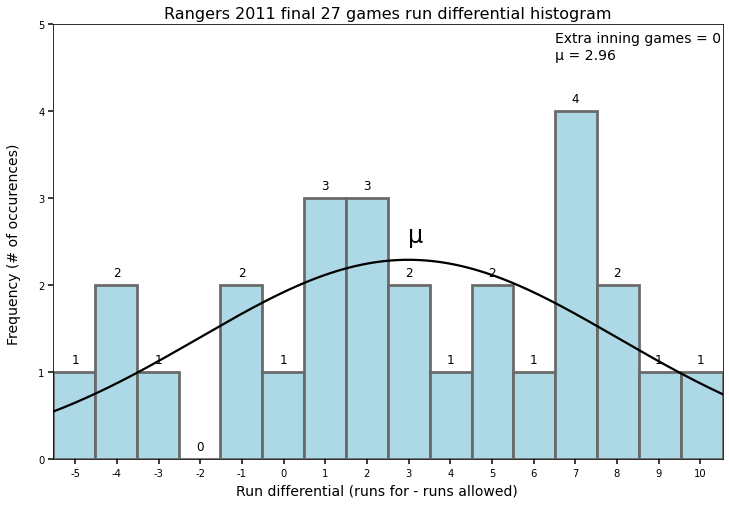

In [31]:
x = np.round(np.arange(rdiff_mean_sample-std_sample*3,
                       rdiff_mean_sample+std_sample*3,
                       0.01),2)

norm_curve_sample = norm.pdf(x,rdiff_mean_sample,std_sample)*sample_size

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.hist(rdiff_sample,bins=bins_count_3.shape[0],color='lightblue',ec='dimgray',linewidth=2.75)
norm_curve_hist = ax.plot(x,norm_curve_sample,color='k',linewidth=2.25)

x_ax_set = ax.set_xlim([rdiff_min_sample,rdiff_max_sample])
y_ax_set = ax.set_ylim([0,np.max(bins_count_3)+1])

ax.tick_params(length=5,width=1.5)

'''
   Same method for setting x-ticks and histogram
   labels as in plot in prior cell.
'''

rdiff_range = np.arange(rdiff_min_sample,rdiff_max_sample+1,1)
offset = np.round(np.linspace(0.5,-0.5,bins_count_3.shape[0]),2)
x_tickmarks = np.zeros(bins_count_3.shape[0])

for labels in range(bins_count_3.shape[0]):
    bin_count_labels = ax.text(rdiff_range[labels]+offset[labels],
                               bins_count_3[labels]+0.1,
                               str(bins_count_3[labels]),fontsize='12',
                               horizontalalignment='center')
                               
    x_tickmarks[labels] = rdiff_range[labels] + offset[labels]
                               
xtick_plot = ax.set_xticks(x_tickmarks)
xticklabels = ax.set_xticklabels(rdiff_range)
ytick_plot = ax.set_yticks(np.arange(0,np.max(bins_count_3)+2,1))

ax.text(rdiff_mean_sample,np.max(norm_curve_sample)+0.2,'μ',fontsize=24)
ax.text(6.25,4.8,'Extra inning games = 0',fontsize=14)
ax.text(6.25,4.6,str('μ ='+' '+str(rdiff_mean_sample)),fontsize=14)
title_plot = plt.title('Rangers 2011 final 27 games run differential histogram',fontsize= 16)
xlabel = fig.text(0.5, 0.07, 'Run differential (runs for - runs allowed)', ha='center', va='center', fontsize = 14)
ylabel = fig.text(0.08, 0.5, 'Frequency (# of occurences)', ha='center', va='center', rotation='vertical', fontsize = 14)

In [32]:
'''
   Checking to see how well actual number of games for sample
   falls within the expected number of games as in prior cells
   using standard deviation.
'''

count_1_std = 0
count_2_std = 0
for games in range(sample_size):
    if rdiff_sample[games] > (rdiff_mean_sample-std_sample) and rdiff_sample[games] < (rdiff_mean_sample+std_sample):
        count_1_std = count_1_std + 1
    else:
        continue
        
for games in range(sample_size):
    if rdiff_sample[games] > (rdiff_mean_sample-2*std_sample) and rdiff_sample[games] < (rdiff_mean_sample+2*std_sample):
        count_2_std = count_2_std + 1
    else:
        continue


'''Printing desired values'''

#Two-tailed tests
print(color.BOLD+color.UNDERLINE+'Two-tailed tests'+color.END,'\n')

std_1_range = str(np.round((count_1_std/sample_size)*100,1))
print(color.BOLD+color.BLUE+'Games falling between 1σ of mean'+color.END)
print('Actual:'+' '+std_1_range+'%')
print('Expected:'+' '+'68.2%')
print('\n',end='')

std_2_range = str(np.round((count_2_std/sample_size)*100,1))
print(color.BOLD+color.BLUE+'Games falling between 2σ of the mean'+color.END)
print('Actual:'+' '+std_2_range+'%')
print('Expected:'+' '+'95.4%')
print('\n',end='')

outliers = str(np.round(100-(count_2_std/sample_size)*100,1))
print(color.BOLD+color.BLUE+'All data falling outside of 2σ of the mean'+color.END)
print('Actual:'+' '+outliers+'%')
print('Expected:'+'4.6%')
print('\n',end='')

#Other metrics
print(color.BOLD+color.UNDERLINE+'Other relevant metrics'+color.END,'\n')
print('\033[1m'+'Mode:'+'\033[0m'+' '+'4')
median_val = str(int(np.median(rdiff_season)))
print('\033[1m'+'Median:'+'\033[0m'+' '+median_val)

Two-tailed tests 

Games falling between 1σ of mean
Actual: 70.4%
Expected: 68.2%

Games falling between 2σ of the mean
Actual: 100.0%
Expected: 95.4%

All data falling outside of 2σ of the mean
Actual: 0.0%
Expected:4.6%

Other relevant metrics 

Mode: 4
Median: 1


In [33]:
'''
   One-tailed tests
   
   One-tailed test for data within two
   standard deviations of the mean will
   illustrate the amount of games falling
   to the left (-) and right (+) of the
   mean.
'''

count_pos1_std = 0
count_neg1_std = 0
for games in range(sample_size):
    if rdiff_sample[games] > (rdiff_mean_sample-std_sample) and rdiff_sample[games] < rdiff_mean_sample:
        count_neg1_std = count_neg1_std + 1
    elif rdiff_sample[games] < (rdiff_mean_sample+std_sample) and rdiff_sample[games] > rdiff_mean_sample:
        count_pos1_std = count_pos1_std + 1
        
count_pos2_std = 0
count_neg2_std = 0
for games in range(sample_size):
    if rdiff_sample[games] > (rdiff_mean_sample-2*std_sample) and rdiff_sample[games] < (rdiff_mean_sample):
        count_neg2_std = count_neg2_std + 1
    elif rdiff_sample[games] < (rdiff_mean_sample+2*std_sample) and rdiff_sample[games] > (rdiff_mean_sample):
        count_pos2_std = count_pos2_std + 1
        

#One-tailed tests
print(color.BOLD+color.UNDERLINE+'One-tailed tests'+color.END,'\n')

std_neg1_range = str(np.round((count_neg1_std/sample_size)*100,1))
print(color.BOLD+color.RED+'Games falling within 1σ to the left of the mean'+color.END)
print('Actual:'+' '+std_neg1_range+'%')
print('Expected:'+' '+'34.1%')
print('\n',end='')

std_neg2_range = str(np.round((count_neg2_std/sample_size)*100,1))
print(color.BOLD+color.RED+'Games falling within 2σ to the left of the mean'+color.END)
print('Actual:'+' '+std_neg2_range+'%')
print('Expected:'+' '+'47.7%')
print('\n',end='')

std_pos1_range = str(np.round((count_pos1_std/sample_size)*100,1))
print(color.BOLD+color.RED+'Games falling within 1σ to the right of the mean'+color.END)
print('Actual:'+' '+std_pos1_range+'%')
print('Expected:'+' '+'34.1%')
print('\n',end='')

std_pos2_range = str(np.round((count_pos2_std/sample_size)*100,1))
print(color.BOLD+color.RED+'Games falling within 2σ to the right of the mean'+color.END)
print('Actual:'+'\033[0m'+' '+std_pos2_range+'%')
print('Expected:'+' '+'47.7%')

One-tailed tests 

Games falling within 1σ to the left of the mean
Actual: 33.3%
Expected: 34.1%

Games falling within 2σ to the left of the mean
Actual: 48.1%
Expected: 47.7%

Games falling within 1σ to the right of the mean
Actual: 37.0%
Expected: 34.1%

Games falling within 2σ to the right of the mean
Actual: 51.9%
Expected: 47.7%


In [34]:
'''
   This shows that the run differential for games in sample 
   is not evenly distributed on each side of the mean.
   
   Calculate the total number of games that are less than and 
   greater than the sample mean.
   
   The expected percentage of games in the sample falling to 
   the left  and right of the mean is 50%. However, the sample 
   size is odd (27 games) so that is not possible.
   
   ***Results***
   
   The chosen sample for this Rangers baseball season is 
   is almost evenly distributed to the left and right of
   the sample mean. The sample data is modeled well using 
   a normal curve.
'''

left_tail_count = 0
right_tail_count = 0

for games in range(sample_size):
    if rdiff_sample[games] < rdiff_mean_sample:
        left_tail_count = left_tail_count + 1
    elif rdiff_sample[games] > rdiff_mean_sample:
        right_tail_count = right_tail_count + 1

left_tail_actual = str(np.round((left_tail_count/sample_size)*100,1))
print(color.BOLD+'Left-tailed test'+color.END)
print(color.BOLD+color.GREEN+'Total:'+color.END+' '+str(left_tail_count)+' '+'games')

print('\n',end='')

right_tail_actual = str(np.round((right_tail_count/sample_size)*100,2))
print(color.BOLD+'Right-tailed test'+color.END)
print(color.BOLD+color.GREEN+'Total:'+color.END+' '+str(right_tail_count)+' '+'games')

Left-tailed test
Total: 13 games

Right-tailed test
Total: 14 games
